In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [6]:
from sklearn.cluster import KMeans

In [8]:
customer_data = pd.read_csv('D:/MALL_SEGMENTATION/Mall_Customers.csv')

In [9]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
customer_data.shape

(200, 5)

In [12]:
customer_data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [14]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
X=customer_data.iloc[:,[3,4]].values

In [16]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [17]:
wcss = []

In [23]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


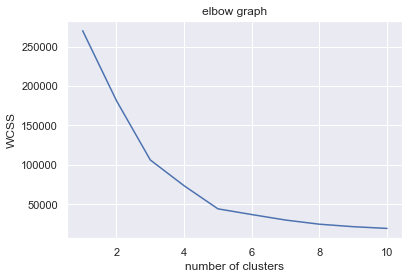

In [27]:
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.title('elbow graph')
plt.show()

In [28]:
 kmeans=KMeans(n_clusters= 5, init='k-means++', random_state=0)

In [29]:
Y=kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


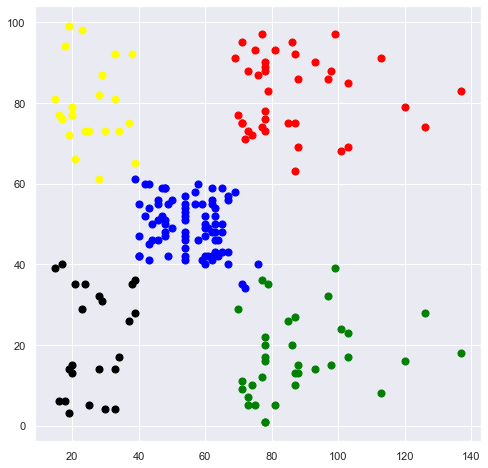

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='red',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='yellow',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='black',label='Cluster 5')

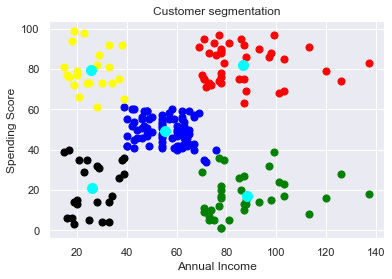

In [34]:

plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='red',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='yellow',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='black',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroid')
plt.title('Customer segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()